### Import Dependencies

In [65]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns

In [3]:
# PCA dependencies
from sklearn.preprocessing import StandardScaler

In [4]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Get LATEST driver version for 91.0.4472
Trying to download new driver from https://chromedriver.storage.googleapis.com/91.0.4472.101/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Andrew\.wdm\drivers\chromedriver\win32\91.0.4472.101]


In [5]:
#Page URL
url = 'https://www.trulia.com/for_sale/36.63199,38.40726,-78.77798,-76.20855_xy/9_zm/'
browser.visit(url)

### Web Scrape

In [6]:
# Initialize Lists
housePrices = []
houseRegion = []
houseSqrFt = []
houseBath = []
houseBed = []


#For each page of houses
for x in range(1, 50):
    
    print(f'Processing Page {x} - Initialize', end='\r')
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    #Data scrape from html
    prices = soup.find_all('div', {'data-testid' : "property-price"})
    beds = soup.find_all('div', {'data-testid' : "property-beds"})
    baths = soup.find_all('div', {'data-testid' : "property-baths"})
    sqrFt = soup.find_all('div', {'data-testid' : "property-floorSpace"})
    region = soup.find_all('div', {'data-testid' : "property-region"})
    print(f'Processing Page {x} - Data Scrape', end='\r')
    
    #Add scraped data to lists
    for i, price in enumerate(prices):        
        housePrices.append(price.text)
        houseBed.append(beds[i].text[0])
        houseBath.append(baths[i].text[0])
        houseSqrFt.append(sqrFt[i].text.split()[0])
        houseRegion.append(region[i].text)
    print(f'Processing Page {x} - List append', end='\r')

    #Next Page button
    browser.find_by_xpath('//*[@id="resultsColumn"]/nav/ul/li[8]/a/div/svg')
    print(f'Processing Page {x} - Next Page', end='\r')
    
    

In [7]:
# Initialize Data Frame
house_df = pd.DataFrame(
    {
        'Prices': housePrices,
        'Beds': houseBed,
        'Baths': houseBath,
        'SquareFt': houseSqrFt,
        'Loc': houseRegion
    }

)

In [8]:
#Data Conversion

try: 
    house_df.SquareFt = house_df.SquareFt.str.replace(',', '').astype(int)
except:
    print('Sqrft Data already converted.')
try:
    house_df.Beds = house_df.Beds.astype(int)
except:
    print('Bed Data already converted.')
try:
    house_df.Bath = house_df.Bath.astype(int)
except:
    print('Bath Data already converted.')

try:
    house_df.Prices = house_df.Prices.replace('[\$,]', '', regex=True).astype(float)
except:
    print('Price Data already Converted.')


Bath Data already converted.


In [9]:
house_df.dtypes

Prices      float64
Beds          int32
Baths        object
SquareFt      int32
Loc          object
dtype: object

In [10]:
house_df

,Prices,Beds,Baths,SquareFt,Loc
0,270000.0,4,3,2283,"Western Branch South, Chesapeake, VA"
1,299750.0,4,2,1750,"South Norfolk, Chesapeake, VA"
2,260000.0,3,2,2444,"North Chesterfield, VA"
3,380000.0,5,3,2750,"Midlothian, VA"
4,489000.0,3,3,2351,"Glen Allen, VA"
...,...,...,...,...,...
1465,240000.0,4,2,2620,"Mercury Central, Hampton, VA"
1466,310000.0,4,3,2000,"Great Bridge East, Chesapeake, VA"
1467,350000.0,4,3,2238,"Fredericksburg, VA"
1468,295000.0,4,3,2016,"Henrico, VA"


### Analysis


In [86]:
#Average Price of a house for a sample of counties in Virginia
house_df.groupby('Loc').Prices.mean().round(2).sort_values()

Loc
British Camp Farms, Richmond, VA        189900.00
Indian River, Chesapeake, VA            195000.00
Gloucester, VA                          234950.00
Mercury Central, Hampton, VA            240000.00
Mayfield, Fredericksburg, VA            259900.00
Western Branch South, Chesapeake, VA    260000.00
Chesterfield, VA                        285000.00
North Chesterfield, VA                  287500.00
Suffolk, VA                             290975.00
Williamsburg, VA                        292500.00
South Norfolk, Chesapeake, VA           299750.00
Greenbrier West, Chesapeake, VA         300000.00
Great Bridge East, Chesapeake, VA       310000.00
Fredericksburg, VA                      310000.00
Forest Hill, Richmond, VA               365000.00
Charlottesville, VA                     379000.00
Midlothian, VA                          380000.00
Montross, VA                            399999.00
Henrico, VA                             446333.33
Glen Allen, VA                          489000

Text(0.5, 1.0, 'Virginia Real Estate Prices per County')

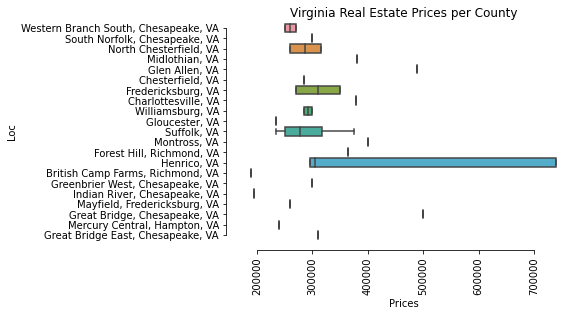

In [91]:
# Visualization
sns.boxplot(x='Prices', y='Loc', data=house_df)
sns.despine(offset=10, trim=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Virginia Real Estate Prices per County')

In [31]:
# Add a column of Ratio of price to square footage for each house
house_df['p/sf'] = house_df.Prices / house_df.SquareFt

In [34]:
# Average Price per square foot for each county
house_df.groupby('Loc')['p/sf'].mean().sort_values()

Loc
Mercury Central, Hampton, VA             91.603053
North Chesterfield, VA                  111.633048
Western Branch South, Chesapeake, VA    112.324209
Midlothian, VA                          138.181818
Greenbrier West, Chesapeake, VA         139.925373
Great Bridge East, Chesapeake, VA       155.000000
Indian River, Chesapeake, VA            156.250000
Williamsburg, VA                        162.366918
South Norfolk, Chesapeake, VA           171.285714
Suffolk, VA                             188.256234
Montross, VA                            190.475714
Mayfield, Fredericksburg, VA            190.682318
British Camp Farms, Richmond, VA        193.973442
Charlottesville, VA                     195.360825
Chesterfield, VA                        197.916667
Henrico, VA                             200.526913
Fredericksburg, VA                      204.717778
Glen Allen, VA                          207.996597
Great Bridge, Chesapeake, VA            217.391304
Gloucester, VA             

Text(0.5, 1.0, 'Virginia Real Estate Price/SquareFt per County')

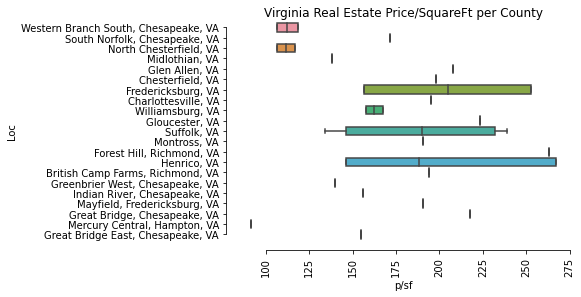

In [90]:
# Visualization
sns.boxplot(x='p/sf', y='Loc', data=house_df)
sns.despine(offset=10, trim=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Virginia Real Estate Price/SquareFt per County')

In [107]:
henrico = house_df[house_df['Loc'] == 'Henrico, VA']['Prices']
henrico.describe()


count       147.000000
mean     446333.333333
std      207694.498161
min      295000.000000
25%      295000.000000
50%      305000.000000
75%      739000.000000
max      739000.000000
Name: Prices, dtype: float64

In [116]:
henrico.sort_values()

748     295000.0
1138    295000.0
358     295000.0
388     295000.0
1078    295000.0
          ...   
855     739000.0
1185    739000.0
285     739000.0
1215    739000.0
15      739000.0
Name: Prices, Length: 147, dtype: float64

### Additional Analysis (PCA)

In [12]:
features = ['Prices', 'Beds', 'Baths', 'SquareFt']

In [13]:
x = house_df.loc[:, features].values

y = house_df.loc[:,['Loc']].values

x = StandardScaler().fit_transform(x)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principal_df = pd.DataFrame(
    data = principalComponents,
    columns = ['pc1', 'pc2']
    
)

In [15]:
finalDf = pd.concat(
    [principal_df, house_df[['Loc']]], axis = 1
)

In [16]:
finalDf

,pc1,pc2,Loc
0,0.931828,-0.921710,"Western Branch South, Chesapeake, VA"
1,-0.410046,-0.214206,"South Norfolk, Chesapeake, VA"
2,-0.533326,0.125796,"North Chesterfield, VA"
3,2.651467,-0.729037,"Midlothian, VA"
4,1.123012,1.524844,"Glen Allen, VA"
...,...,...,...
1465,0.340908,-0.722039,"Mercury Central, Hampton, VA"
1466,0.769024,-0.590567,"Great Bridge East, Chesapeake, VA"
1467,1.197692,-0.274789,"Fredericksburg, VA"
1468,0.727760,-0.712088,"Henrico, VA"


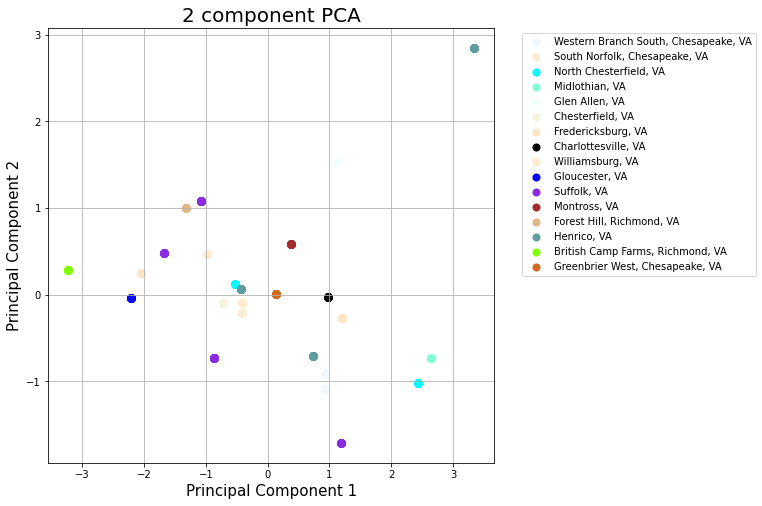

In [22]:

# Additional Plotting
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(pd.unique(house_df.Loc.values))
colors = list(matplotlib.colors.cnames.values())[0:16]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Loc'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets,bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid()

### Export to CSV to load into database


In [92]:
from datetime import date

today = date.today()

house_df.to_csv('./Resources/housingdata_{today}.